In [39]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Input,Conv2D,Dense,Flatten,Dropout,GlobalMaxPooling2D,MaxPooling2D,BatchNormalization
from tensorflow.keras .models import Model
from sklearn import metrics

In [41]:
cifar10 = tf.keras.datasets.cifar10
cifar10

<module 'keras.api._v2.keras.datasets.cifar10' from 'C:\\Users\\ASUS\\anaconda3\\lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\cifar10\\__init__.py'>

In [42]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

In [43]:
X_train , X_test = X_train/255.0 ,X_test/255.0
y_train , y_test = y_train.flatten() ,y_test.flatten()
X_train.shape
y_train.shape

(50000,)

In [44]:
classes_of_output = len(set(y_train))
classes_of_output

10

In [45]:
i = Input(shape = X_train[0].shape)
x = Conv2D(32,(3,3), activation = 'relu', padding = 'same')(i)
x = BatchNormalization()(x)
x = Conv2D(32,(3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
x = Conv2D(64,(3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = Conv2D(64,(3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
x = Conv2D(128,(3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = Conv2D(128,(3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(classes_of_output, activation = 'softmax')(x)

model = Model(i,x)


In [31]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [32]:
r = model.fit(x = X_train, y = y_train, validation_data = (X_test,y_test), epochs = 60)

Epoch 1/60
1563/1563 [==============================] - 291s 185ms/step - loss: 1.3413 - accuracy: 0.5381 - val_loss: 0.9754 - val_accuracy: 0.6643
Epoch 2/60
1563/1563 [==============================] - 156s 99ms/step - loss: 0.8565 - accuracy: 0.7030 - val_loss: 0.9043 - val_accuracy: 0.6861
Epoch 3/60
1563/1563 [==============================] - 157s 100ms/step - loss: 0.6963 - accuracy: 0.7615 - val_loss: 0.9765 - val_accuracy: 0.6827
Epoch 4/60
1563/1563 [==============================] - 153s 98ms/step - loss: 0.5884 - accuracy: 0.7990 - val_loss: 0.6418 - val_accuracy: 0.7789
Epoch 5/60
1563/1563 [==============================] - 150s 96ms/step - loss: 0.4973 - accuracy: 0.8280 - val_loss: 0.5887 - val_accuracy: 0.8073
Epoch 6/60
1563/1563 [==============================] - 149s 96ms/step - loss: 0.4264 - accuracy: 0.8533 - val_loss: 0.6105 - val_accuracy: 0.8050
Epoch 7/60
1563/1563 [==============================] - 149s 96ms/step - loss: 0.3587 - accuracy: 0.8764 - val_loss:

In [33]:
# Data Augmentation

batch_size = 32	
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range = 0.1 , height_shift_range = 0.1,horizontal_flip = True)
train_generator = data_generator.flow(X_train,y_train,batch_size)
steps_per_epoch = X_train.shape[0] // batch_size
r = model.fit_generator(train_generator , validation_data = (X_test,y_test), steps_per_epoch = steps_per_epoch , epochs = 60)


Epoch 1/60


<ipython-input-33-ec21d00234aa>:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(train_generator , validation_data = (X_test,y_test), steps_per_epoch = steps_per_epoch , epochs = 60)


1562/1562 [==============================] - 161s 103ms/step - loss: 0.5297 - accuracy: 0.8315 - val_loss: 0.5103 - val_accuracy: 0.8335
Epoch 2/60
1562/1562 [==============================] - 160s 103ms/step - loss: 0.4320 - accuracy: 0.8573 - val_loss: 0.4762 - val_accuracy: 0.8419
Epoch 3/60
1562/1562 [==============================] - 161s 103ms/step - loss: 0.3946 - accuracy: 0.8707 - val_loss: 0.4553 - val_accuracy: 0.8568
Epoch 4/60
1562/1562 [==============================] - 159s 102ms/step - loss: 0.3758 - accuracy: 0.8749 - val_loss: 0.4615 - val_accuracy: 0.8490
Epoch 5/60
1562/1562 [==============================] - 158s 101ms/step - loss: 0.3619 - accuracy: 0.8803 - val_loss: 0.4361 - val_accuracy: 0.8541
Epoch 6/60
1562/1562 [==============================] - 155s 99ms/step - loss: 0.3450 - accuracy: 0.8820 - val_loss: 0.4616 - val_accuracy: 0.8603
Epoch 7/60
1562/1562 [==============================] - 155s 99ms/step - loss: 0.3296 - accuracy: 0.8901 - val_loss: 0.4292 

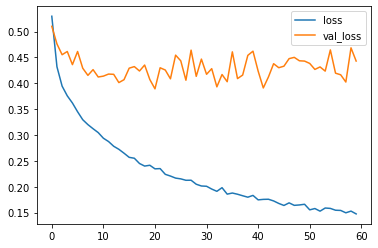

In [34]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

313/313 [==============================] - 7s 21ms/step
Confusion matrix without normalization
[[876   4  25   9   7   1   5  11  46  16]
 [  4 941   1   1   2   0   3   1  12  35]
 [ 25   0 856  18  23  21  37  12   4   4]
 [  6   3  34 736  39  83  56  24  10   9]
 [  4   0  32  21 878  14  36  13   2   0]
 [  3   0  21  70  28 832  19  23   2   2]
 [  3   2  29  18   6   3 934   2   2   1]
 [  5   0  14  13  34  14   2 913   1   4]
 [ 14   4   0   4   2   0   3   0 956  17]
 [  4  21   4   5   4   1   2   1  16 942]]


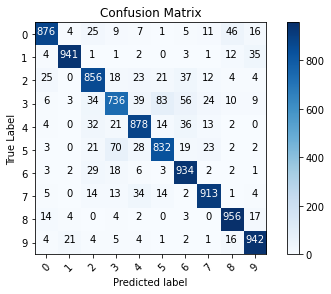

In [35]:
from sklearn.metrics import confusion_matrix 
import itertools

def plot_confusion_matrix(cm,classes,normalize = False,title = 'Confusion Matrix',cmap = plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
        print ('Normalized confusion matrix')
    else:
        print('Confusion matrix without normalization')
        
    print(cm)    
    
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation = 45)
    plt.yticks(tick_marks,classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh  =cm.max() / 2.
    for i , j  in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j , i , format(cm[i ,j],fmt),
                horizontalalignment = 'center',
                color = 'white' if cm[i , j] > thresh else 'black')
     
    
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted label')
    plt.show()
   
p_test = model.predict(X_test).argmax(axis = 1)
cm = confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm, list(range(10)))
   

    

Text(0.5, 1.0, 'true label: [3] Predicted : [4]')

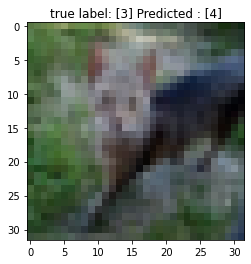

In [36]:
misclassified_idx = np.where(p_test!= y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap = 'gray')
plt.title("true label: %s Predicted : %s" % ([y_test[i]],[p_test[i]]))

In [38]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_6 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_7 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0   